In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
iris = datasets.load_iris() #To load Iris Dataset

In [ ]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"]=iris["target"]
sc=StandardScaler()
sc.fit(df.drop('target',axis=1))
scalar_df= sc.transform(df.drop('target',axis=1))
scalar_df=pd.DataFrame(scalar_df,columns=iris.feature_names)
scalar_df["target"]=iris["target"]

In [ ]:
x=scalar_df.drop(['target'],axis=1).values
y=scalar_df['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)#Train and Test data
def K_Accuracy(n):
    Model=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    prediction=Model.predict(x_test)#Model prediction
    return prediction,n

In [ ]:
a,b=K_Accuracy(6)
print(f"Accuracy Score when K is {b} : {accuracy_score(y_test,a)}")
print(confusion_matrix(y_test,a))

Accuracy Score when K is 6 : 0.94
[[19  0  0]
 [ 0 14  0]
 [ 0  3 14]]


In [ ]:
print(classification_report(y_test,a))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.82      1.00      0.90        14
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [ ]:
#Cross-Validation
cv_scores=[]
kvalues=list(range(1,50,2))
for K in range(1,50,2):# perform 10-fold cross validation
    knn = KNeighborsClassifier(n_neighbors=K)#Model 
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')#perform Crossvalidation
    cv_scores.append(score.mean())
K_Value = kvalues[cv_scores.index(max(cv_scores))]
print(f"Best K Value :{K_Value}")

Best K Value :5


In [ ]:
a,b=K_Accuracy(K_Value)
print(f"Accuracy Score when K is {b} : {accuracy_score(y_test,a)}")
print(confusion_matrix(y_test,a))
print(classification_report(y_test,a))


Accuracy Score when K is 5 : 0.94
[[19  0  0]
 [ 0 14  0]
 [ 0  3 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.82      1.00      0.90        14
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



Text(0, 0.5, 'Accuracy')

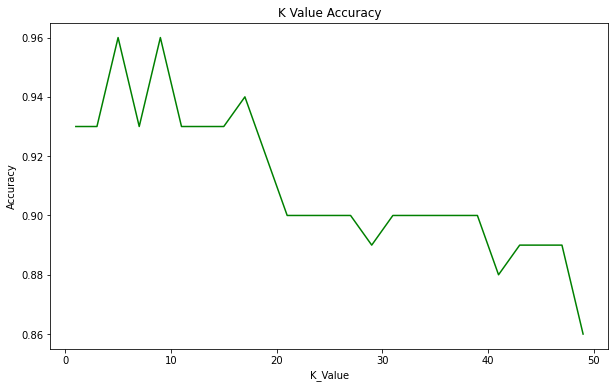

In [ ]:
#Visualization

plt.figure(figsize=(10,6))
plt.plot(kvalues,cv_scores,color='green')
plt.title('K Value Accuracy')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [ ]:
sns.scatterplot(x=df4.index,y=df4.Actual.Test,marker='+',label='original')
sns.scatterplot(x=predicted_values.index,y=predicted_values.predicted_values,marker='o',label='predicted')